In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats.stats import pearsonr

sb.set_context("notebook", font_scale=2.5) # Comment this line if you are running directly in Python.
%matplotlib inline

<ipython-input-1-91145ba4faf9>:12: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
df  = pd.read_csv('wellbeing.csv', sep=',')

In [66]:
df.columns

Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
       'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

Generate correalation pairplot and heatmap

In [3]:
# remove non numeric columns
rows = df.drop(columns=["Timestamp","AGE", "GENDER"])

# clean invalid data in DAILY_STRESS
rows = rows.loc[rows['DAILY_STRESS'] != 36526.0]

array([[<Axes: title={'center': 'FRUITS_VEGGIES'}>,
        <Axes: title={'center': 'DAILY_STRESS'}>,
        <Axes: title={'center': 'PLACES_VISITED'}>,
        <Axes: title={'center': 'CORE_CIRCLE'}>,
        <Axes: title={'center': 'SUPPORTING_OTHERS'}>],
       [<Axes: title={'center': 'SOCIAL_NETWORK'}>,
        <Axes: title={'center': 'ACHIEVEMENT'}>,
        <Axes: title={'center': 'DONATION'}>,
        <Axes: title={'center': 'BMI_RANGE'}>,
        <Axes: title={'center': 'TODO_COMPLETED'}>],
       [<Axes: title={'center': 'FLOW'}>,
        <Axes: title={'center': 'DAILY_STEPS'}>,
        <Axes: title={'center': 'LIVE_VISION'}>,
        <Axes: title={'center': 'SLEEP_HOURS'}>,
        <Axes: title={'center': 'LOST_VACATION'}>],
       [<Axes: title={'center': 'DAILY_SHOUTING'}>,
        <Axes: title={'center': 'SUFFICIENT_INCOME'}>,
        <Axes: title={'center': 'PERSONAL_AWARDS'}>,
        <Axes: title={'center': 'TIME_FOR_PASSION'}>,
        <Axes: title={'center': 'WEEKLY

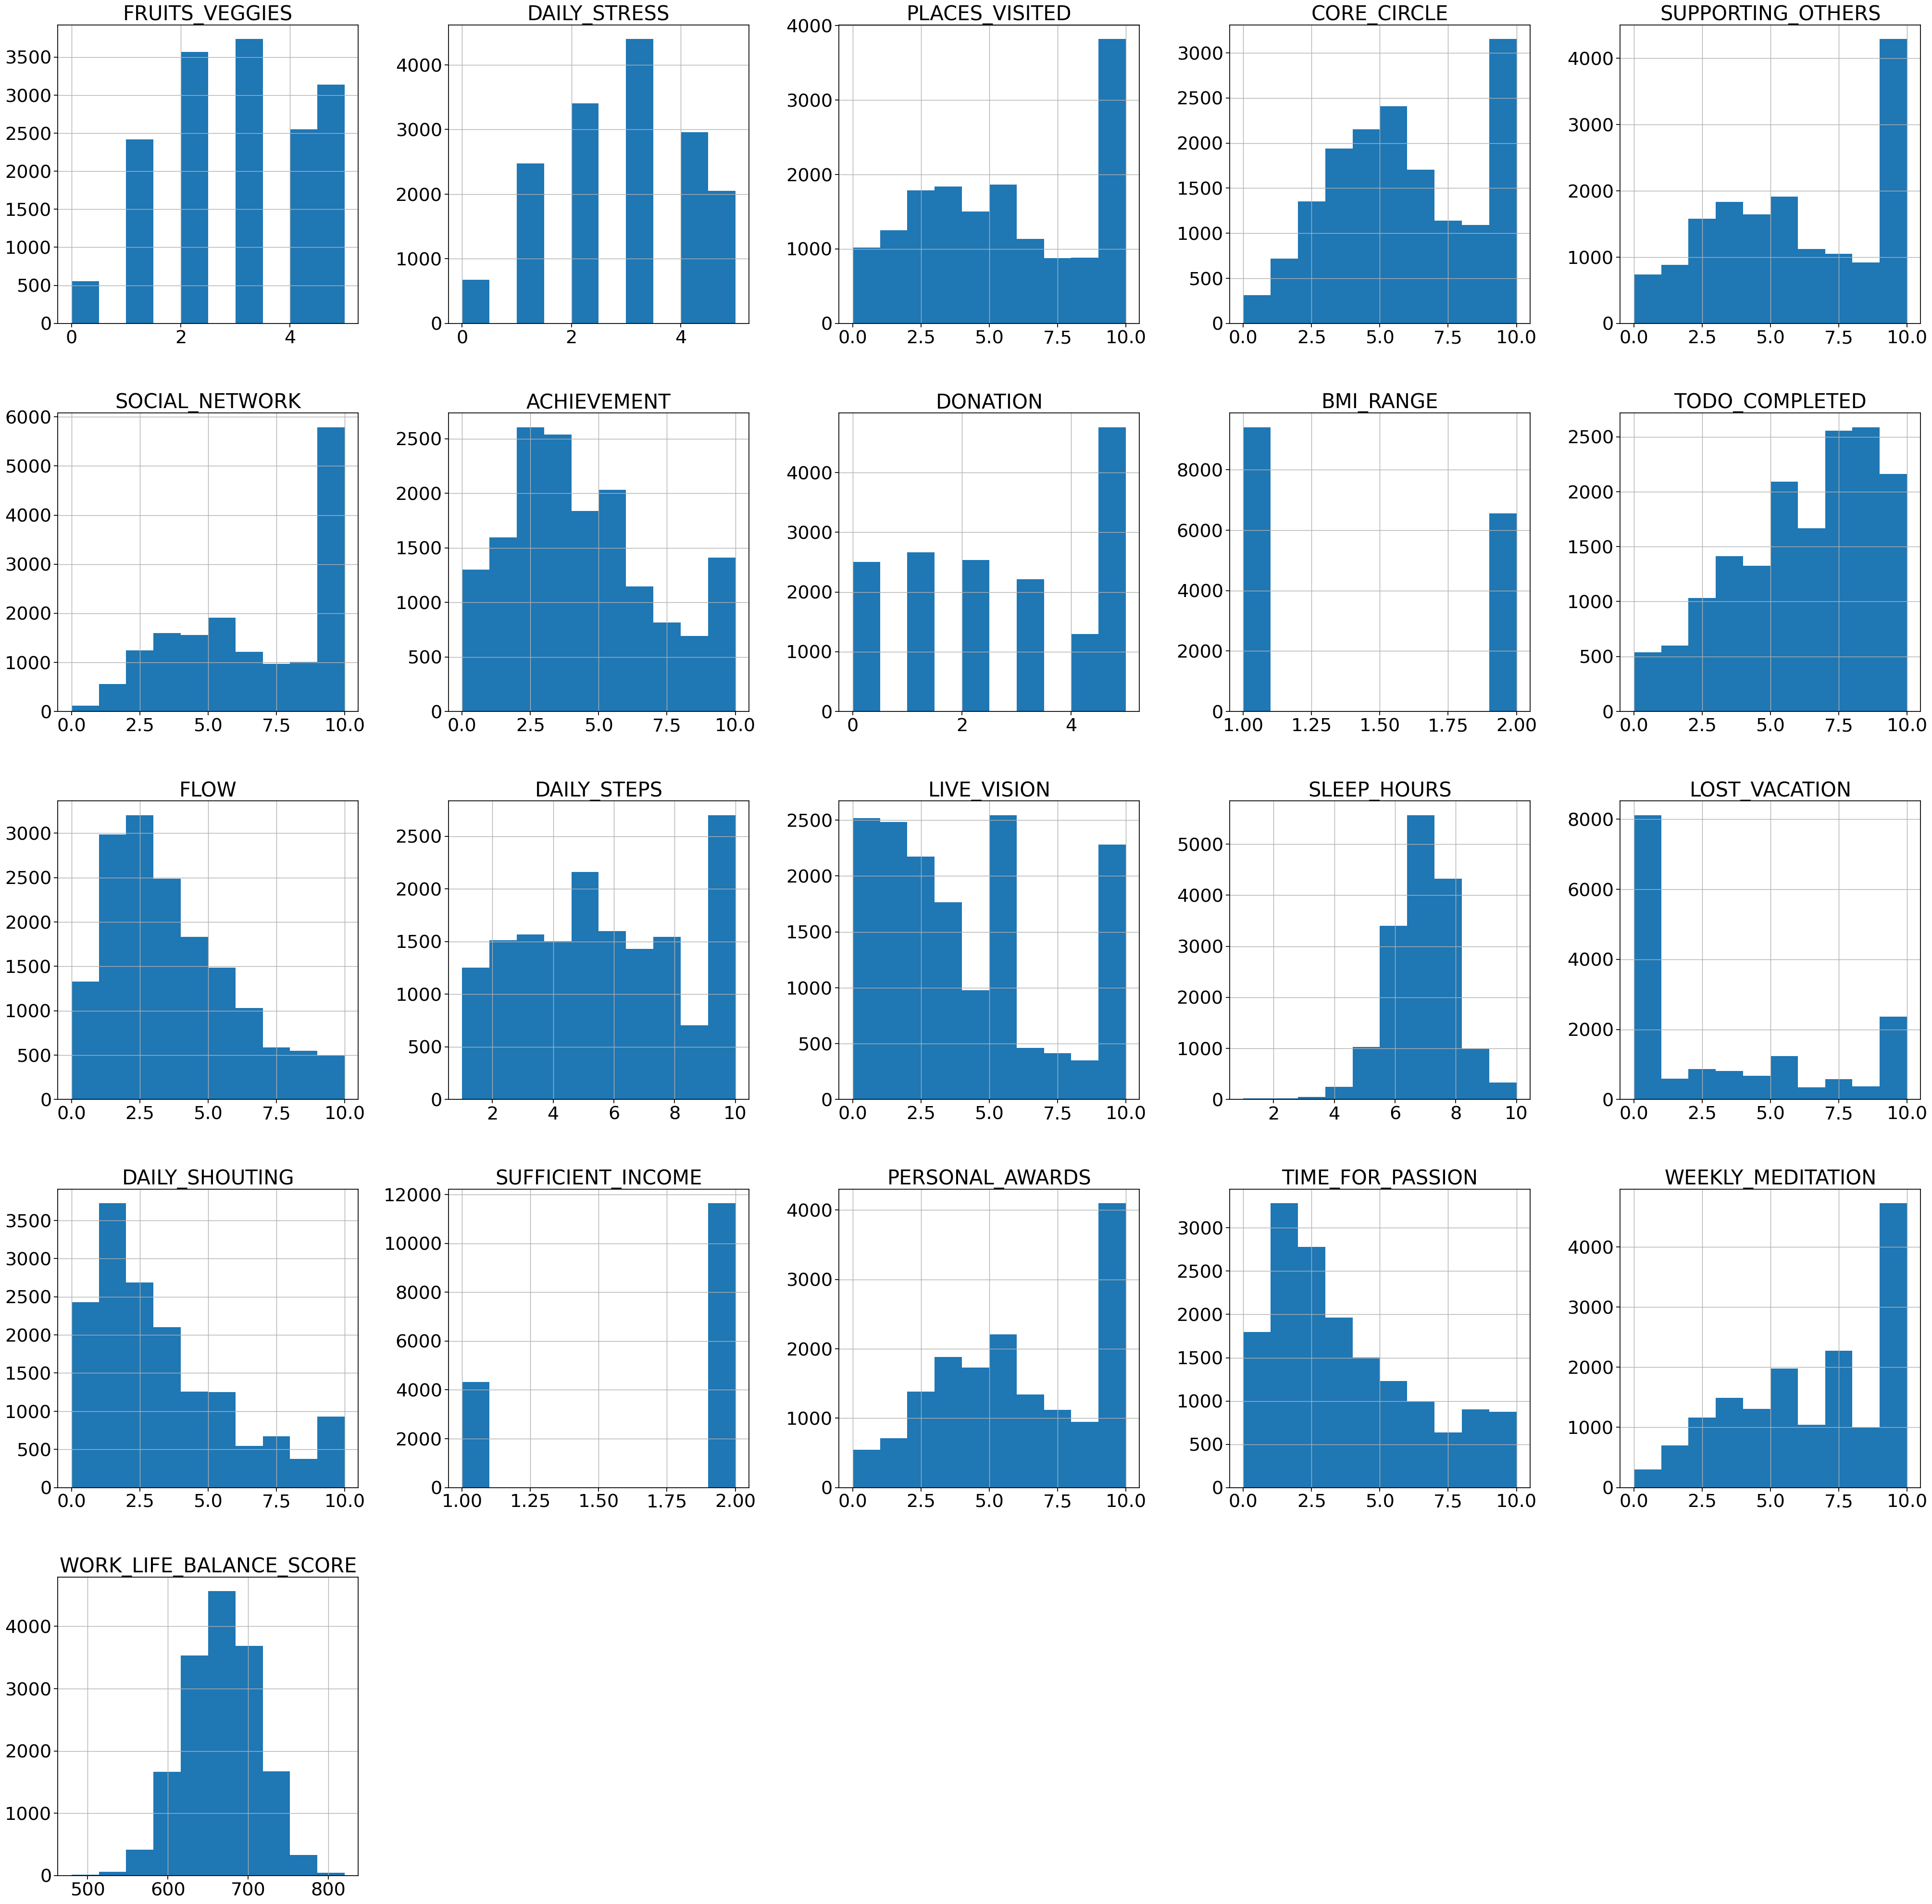

In [68]:
rows.hist(figsize=(50,50))

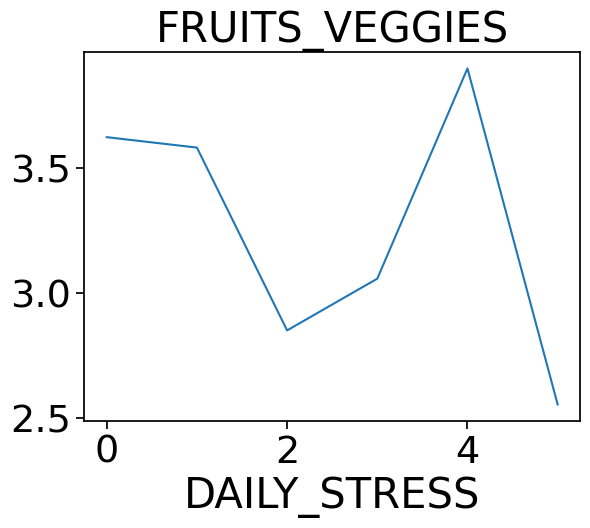

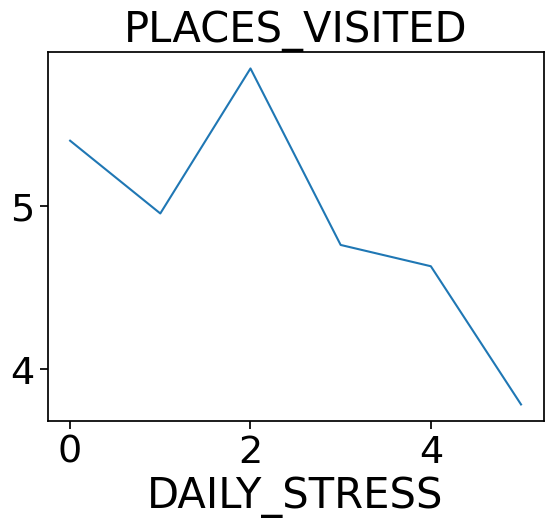

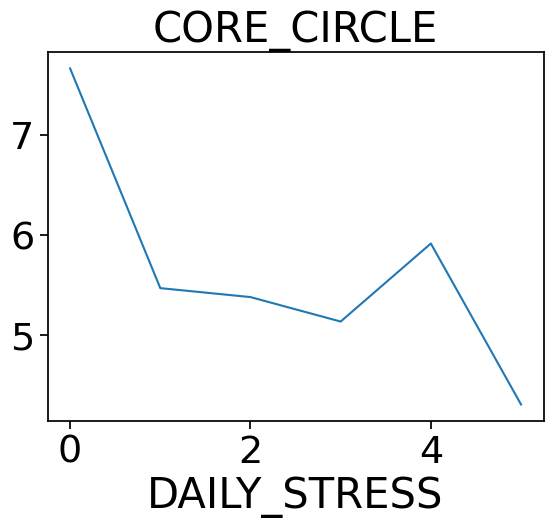

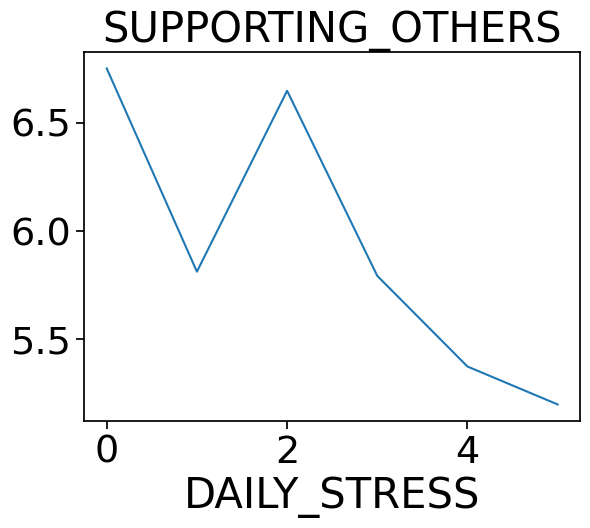

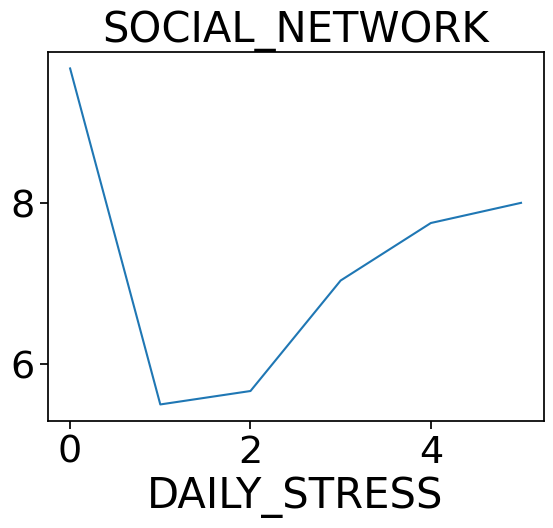

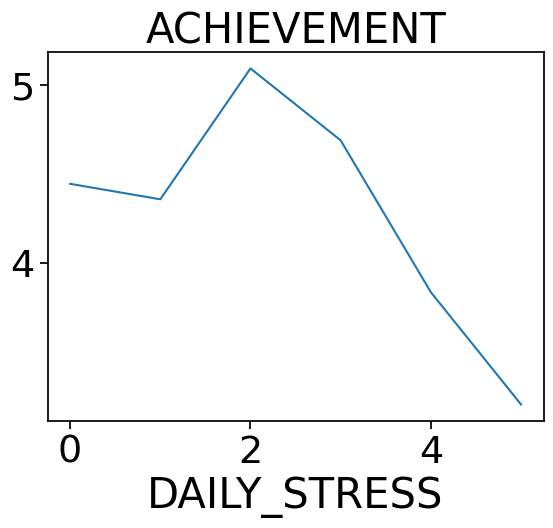

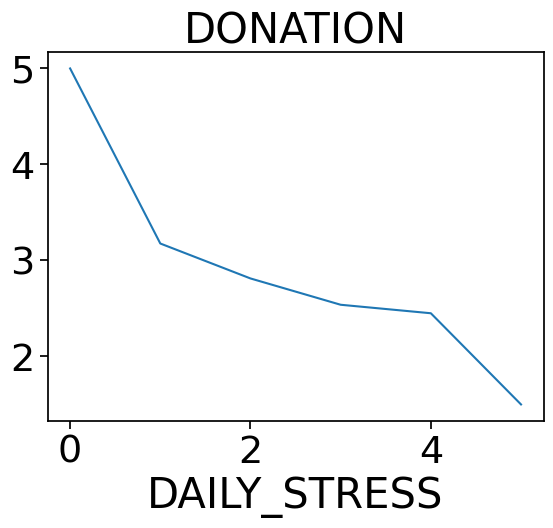

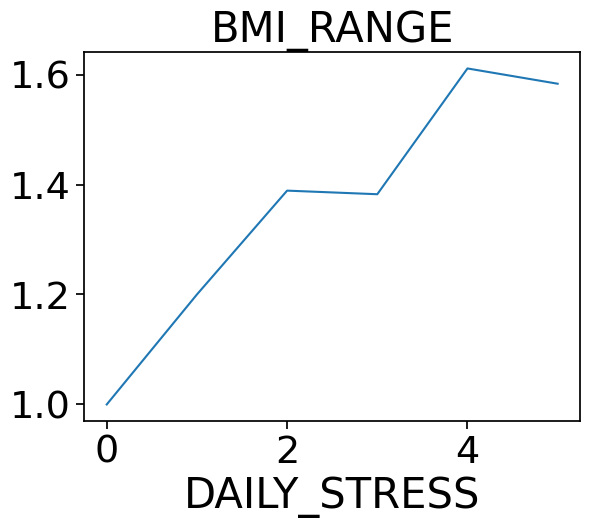

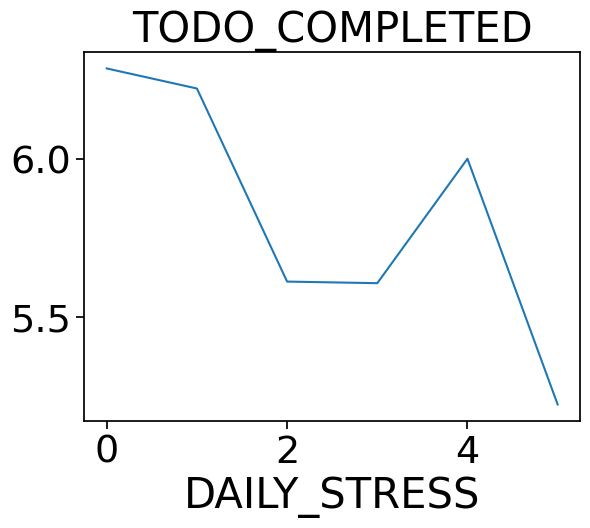

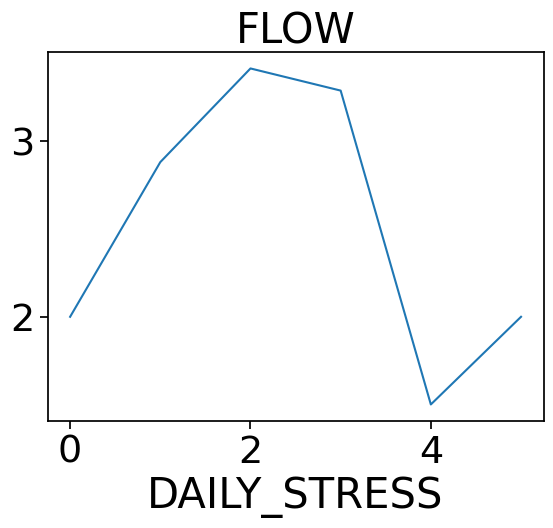

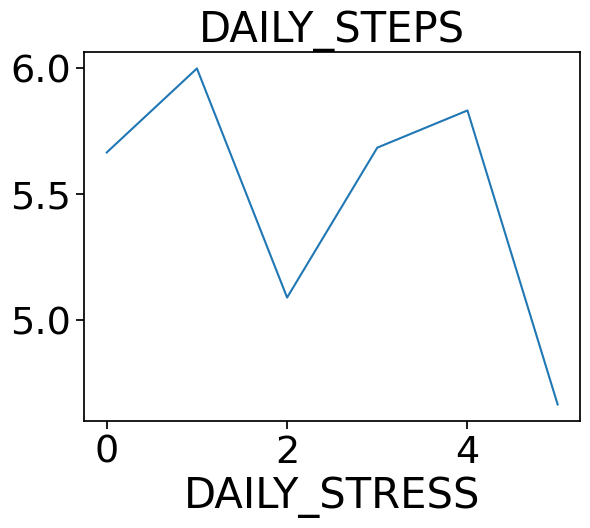

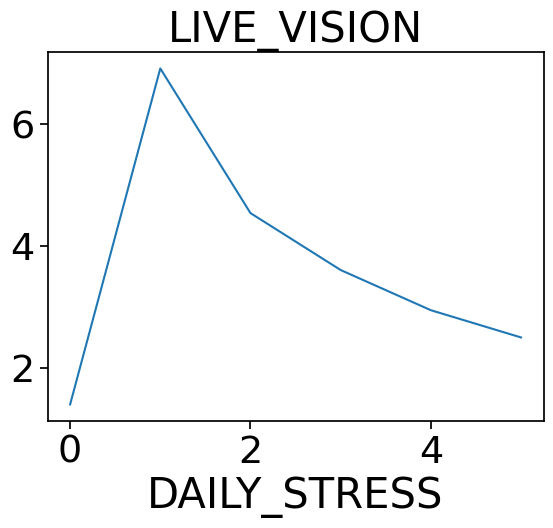

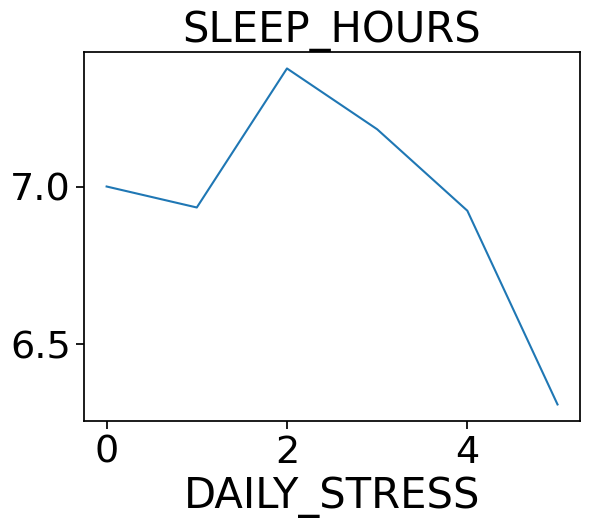

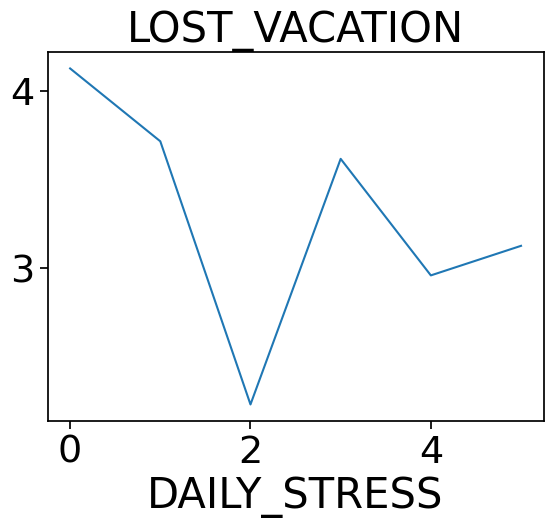

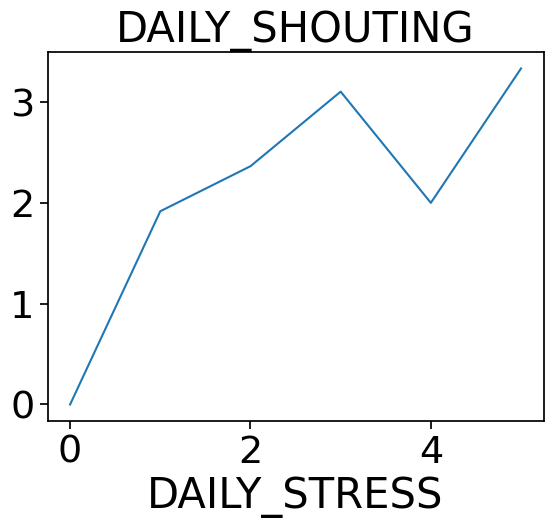

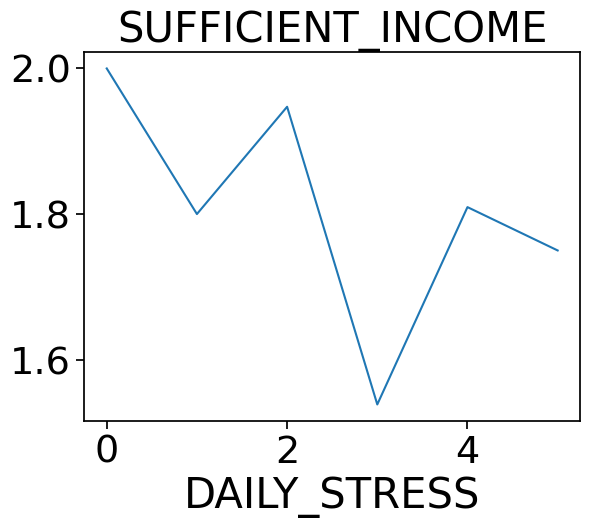

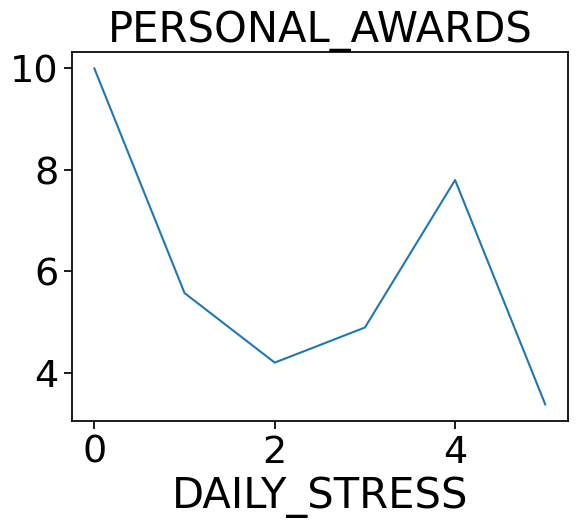

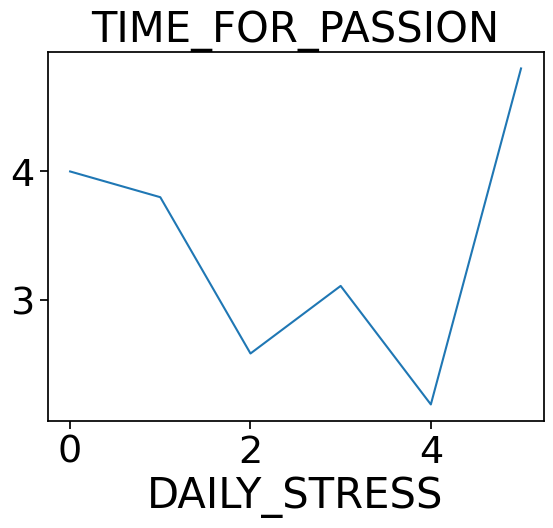

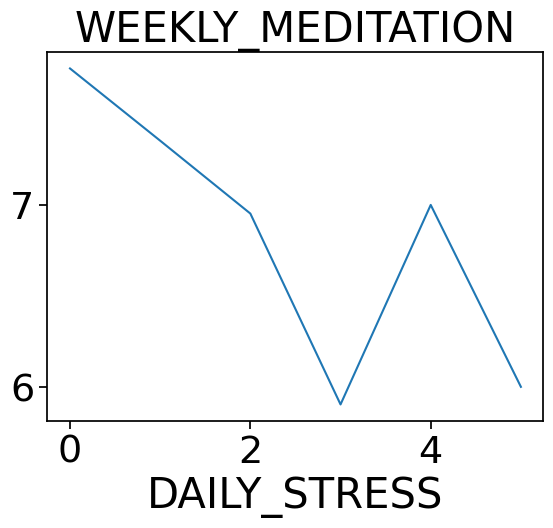

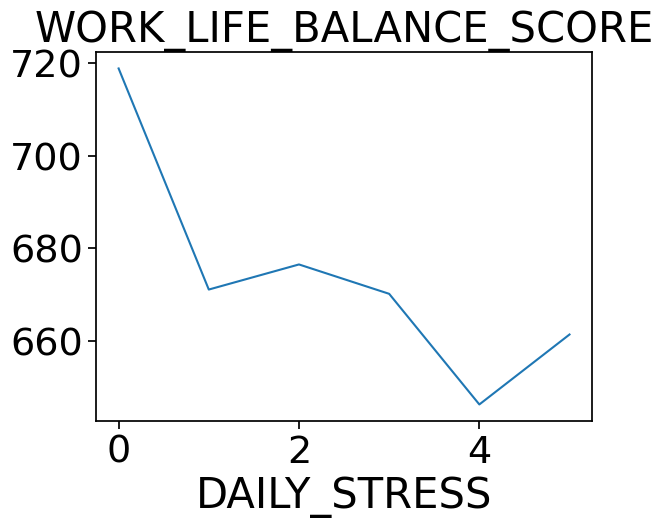

In [65]:
#generate random samples and graph the data

for x in sample:
  if (x != "DAILY_STRESS"):
    sample = rows.sample(n=100)
    sample = sample.groupby("DAILY_STRESS").mean()
    sample[x].plot(title=x)
    plt.show()

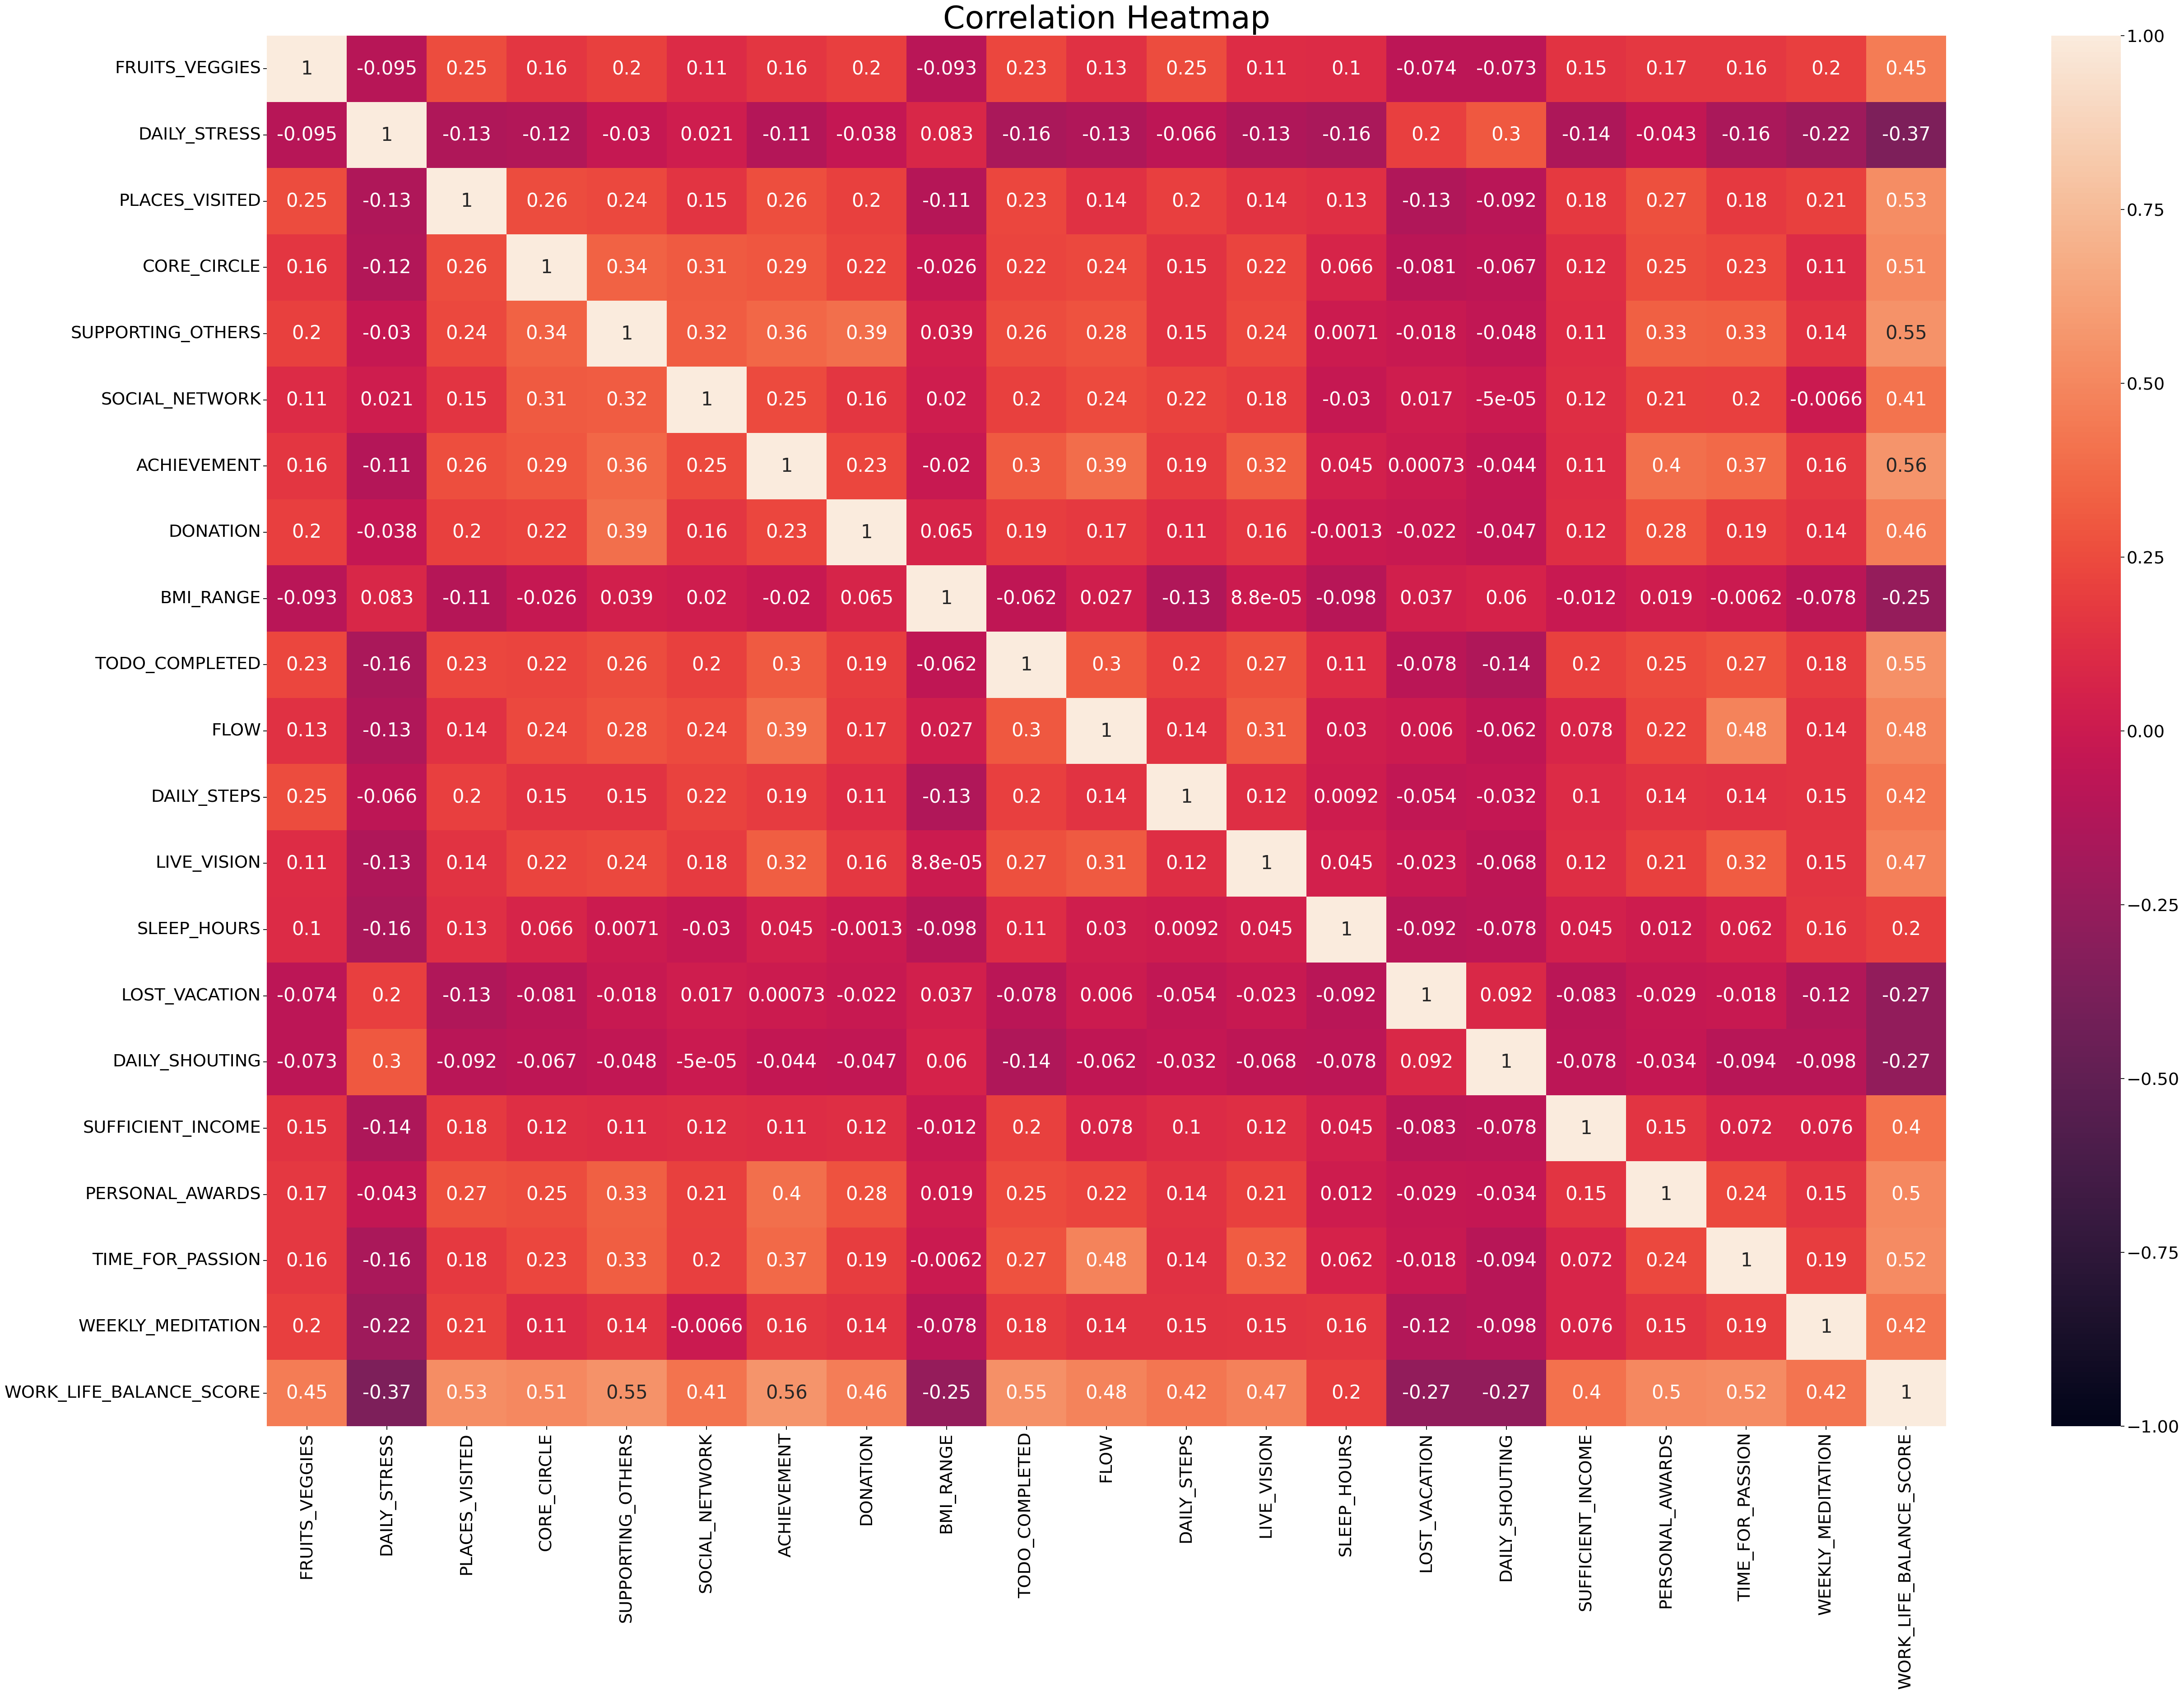

In [ ]:
plt.figure(figsize=(60, 40))
heatmap = sb.heatmap(rows.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=12);

Will create a Scree plot to find best number of PCA components. After analyzing, will create biplot to interpret data

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("pca", PCA(n_components=(len(rows.columns))))
])

# Fit and transform the data
projected_data = pipeline.fit_transform(rows)

# Convert to dataframe
transformed = pd.DataFrame(projected_data)

Text(0, 0.5, 'Variance')

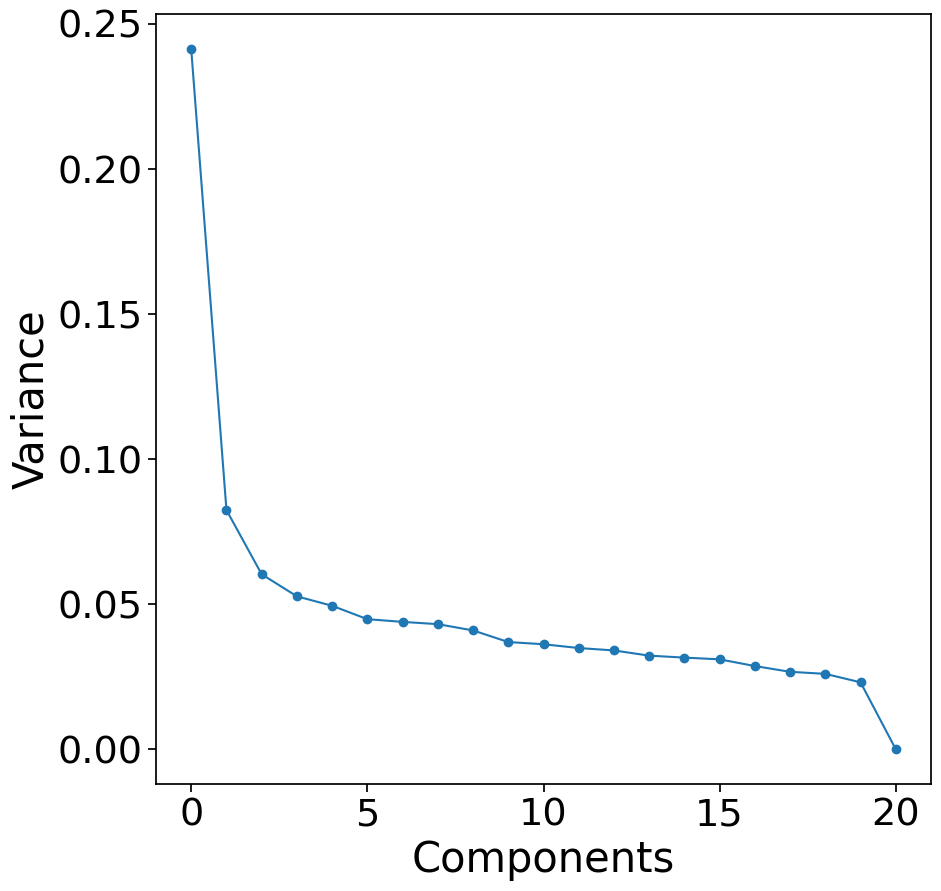

In [ ]:
pca = pipeline.named_steps["pca"]
var = pca.explained_variance_ratio_
plt.figure(figsize=(10,10))
plt.plot(var, marker="o")
plt.xlabel("Components")
plt.ylabel("Variance")

In [ ]:
def biplot(Xt, coeff, labels=None, var_names=None):
  """
  Xt : the transformed data you want to plot. This needs to be a numpy array
  (use .values if you have a dataframe)
  coeff : the matrix of PCA coefficients (weights)
  labels : the class label for each example (used for coloring the scatter plot)
  var_names: a list or array of the names of the independent variables
  (e.g. PC1, PC2, etc)
  @ref https://stackoverflow.com/a/46766116
  """
  xs = Xt[:,0]
  ys = Xt[:,1]
  n = coeff.shape[0]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())
  plt.scatter(xs * scalex,ys * scaley, c = labels,alpha = 0.1)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    if var_names is None:
      plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    else:
      plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, var_names[i], color = 'g', ha = 'center', va = 'center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  plt.grid()

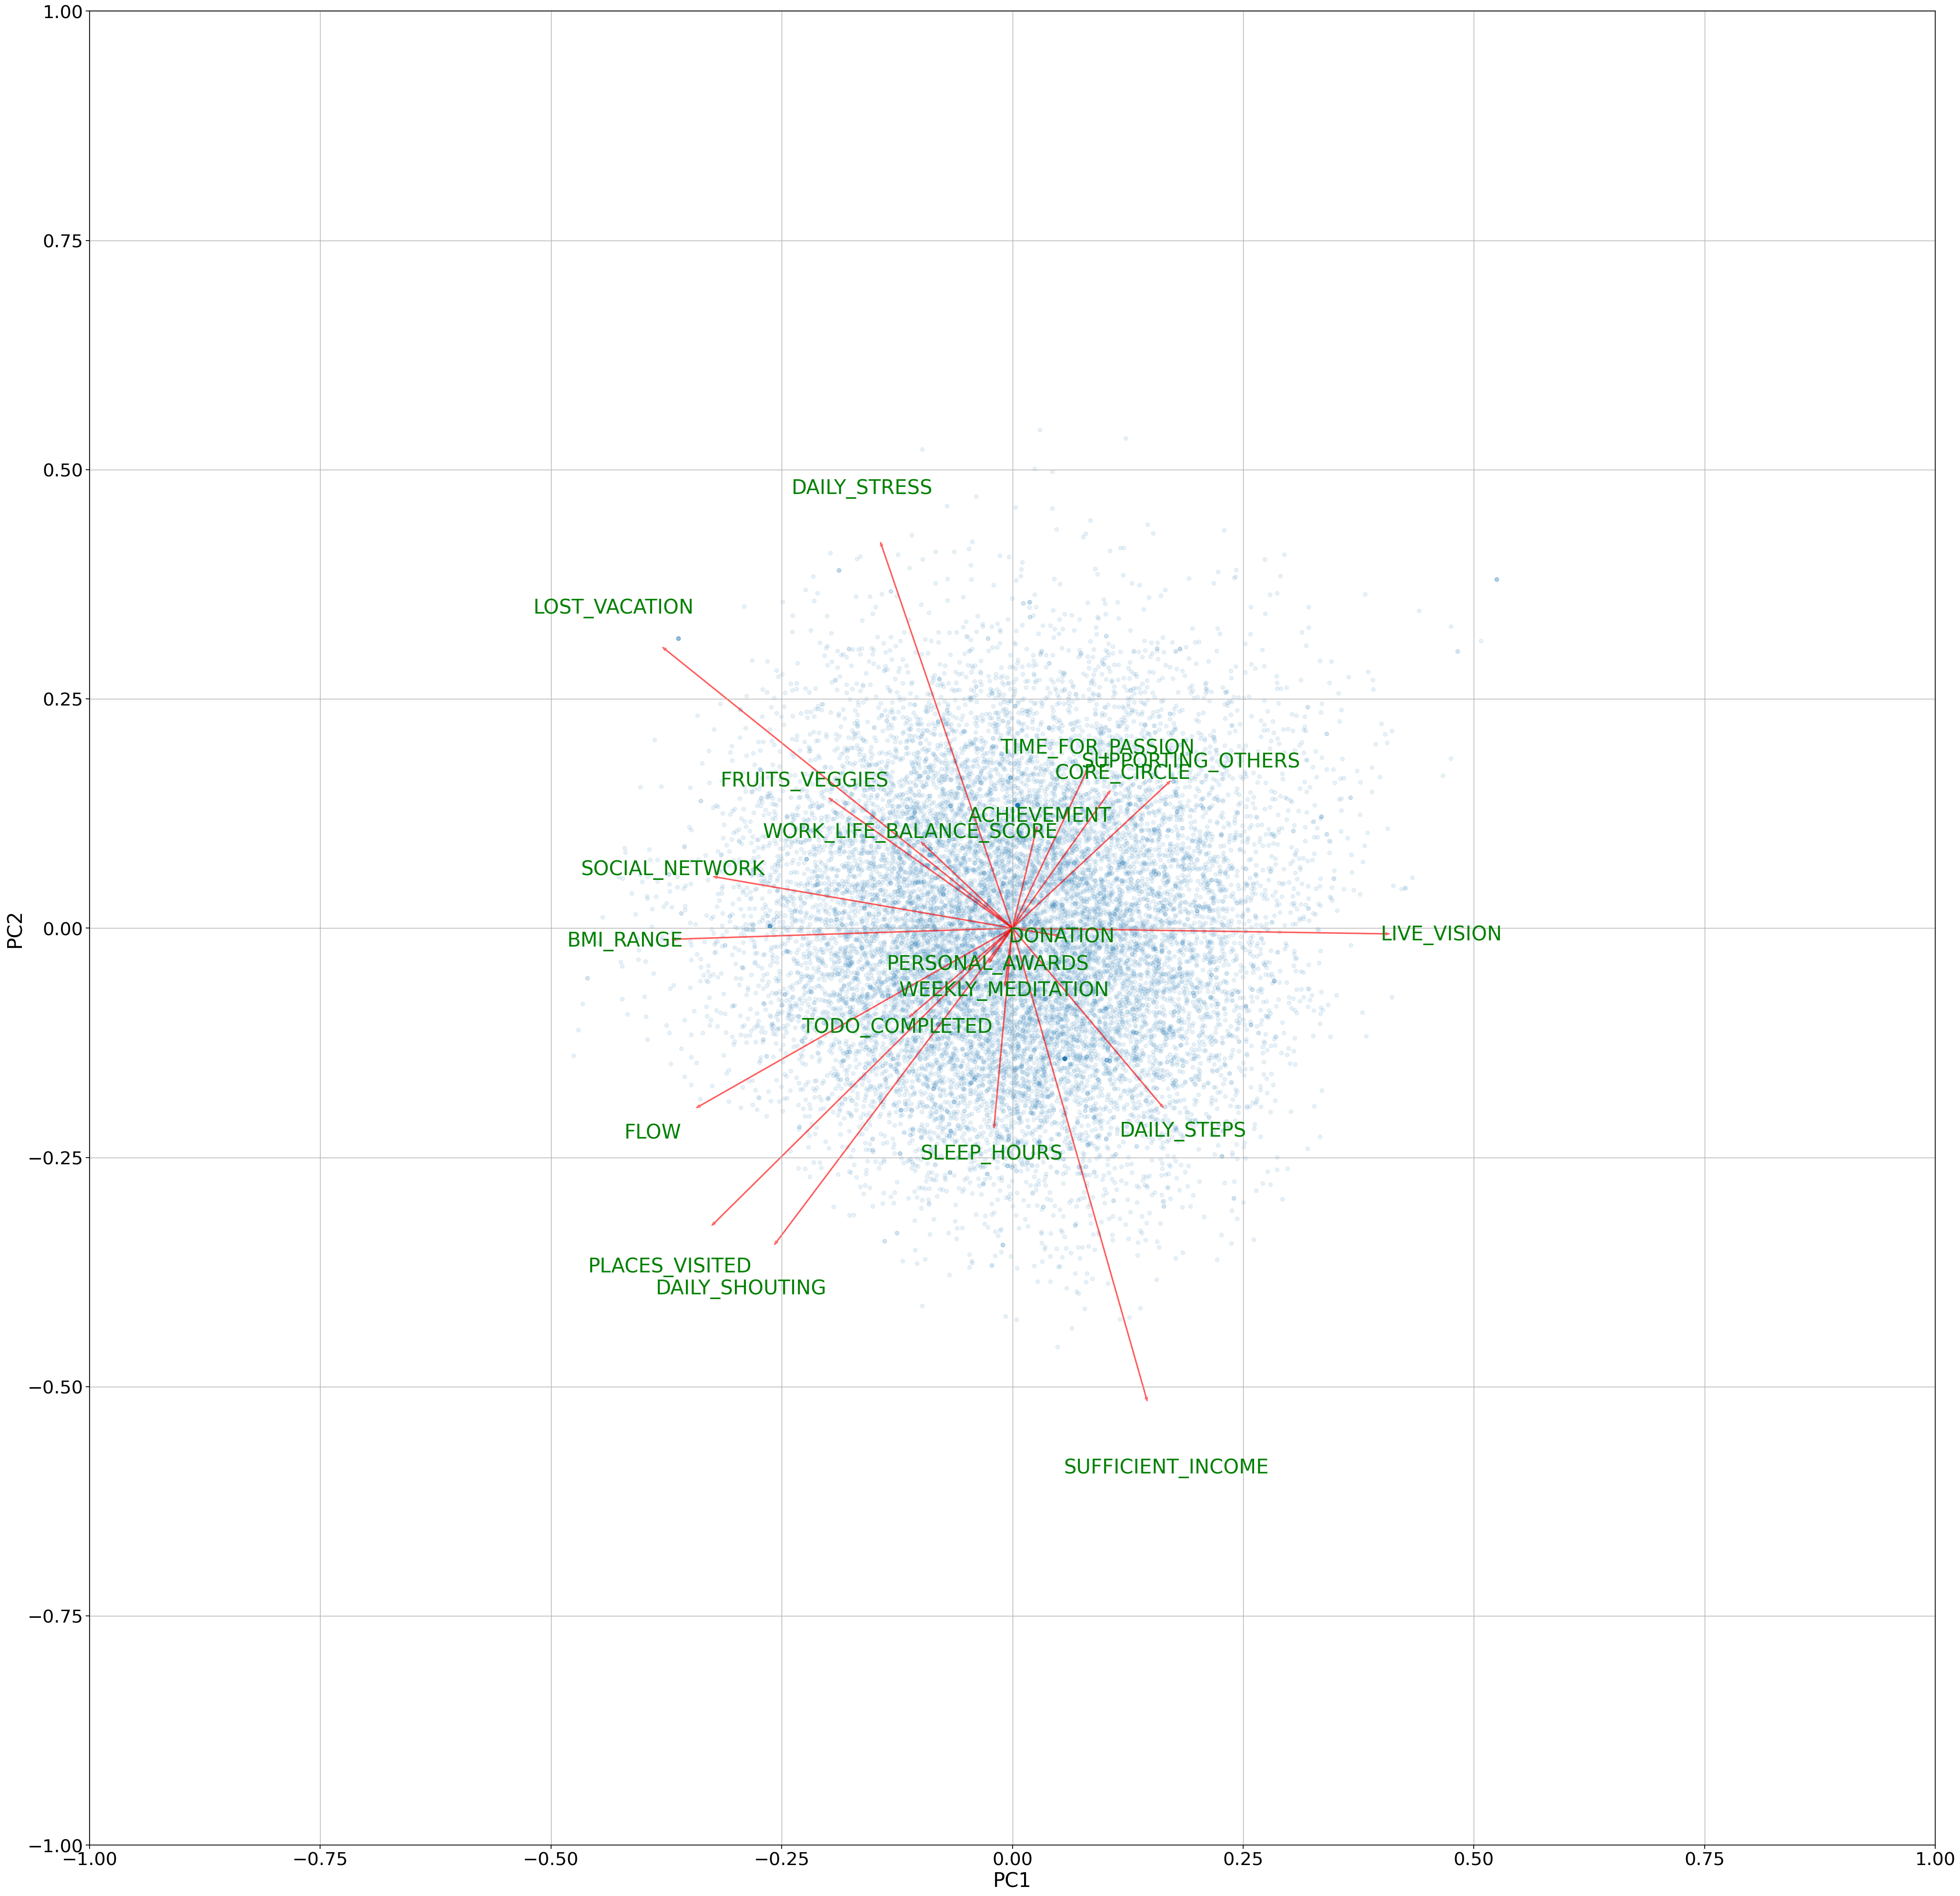

In [ ]:
coeff = pca.components_

plt.figure(figsize=(50,50))
# Create the biplot
biplot(projected_data, coeff, var_names=rows.columns)

In [70]:
def loop_r(df, col1, col2):
  print(pearsonr(df.col1, df.col2))

In [71]:
for col in rows:
  print("Daily stress and " + col + " is: ")
  print(pearsonr(rows.DAILY_STRESS, rows[col]))
  print("\n")

Daily stress and FRUITS_VEGGIES is: 
PearsonRResult(statistic=-0.09453532703092865, pvalue=4.9262748837343e-33)


Daily stress and DAILY_STRESS is: 
PearsonRResult(statistic=0.9999999999999966, pvalue=0.0)


Daily stress and PLACES_VISITED is: 
PearsonRResult(statistic=-0.13485746667650003, pvalue=1.057744772311472e-65)


Daily stress and CORE_CIRCLE is: 
PearsonRResult(statistic=-0.12023833473336117, pvalue=1.6602059604844183e-52)


Daily stress and SUPPORTING_OTHERS is: 
PearsonRResult(statistic=-0.02985154313611571, pvalue=0.00016124667837511304)


Daily stress and SOCIAL_NETWORK is: 
PearsonRResult(statistic=0.020929560613388274, pvalue=0.008167023843837206)


Daily stress and ACHIEVEMENT is: 
PearsonRResult(statistic=-0.11094285579151175, pvalue=6.420681640484353e-45)


Daily stress and DONATION is: 
PearsonRResult(statistic=-0.037721003229589614, pvalue=1.8572318225115344e-06)


Daily stress and BMI_RANGE is: 
PearsonRResult(statistic=0.08311048505791843, pvalue=6.943900239092588